In [1]:
import numpy as np
from matplotlib.image import imread

In [2]:
image_raw=imread('download.jfif')
image_raw.shape

(224, 224, 3)

In [3]:
i=image_raw.sum(axis=2)
print(i.shape)

(224, 224)


In [4]:
ib=i/i.max()
print(ib.max())

1.0


In [5]:
print(ib)

[[0.44444444 0.45228758 0.44313725 ... 0.40261438 0.00522876 0.30980392]
 [0.4248366  0.60653595 0.44444444 ... 0.20784314 0.78039216 0.16470588]
 [0.38169935 0.46405229 0.3751634  ... 0.74379085 0.94771242 0.46143791]
 ...
 [0.43660131 0.45098039 0.43921569 ... 0.26143791 0.11633987 0.12156863]
 [0.46405229 0.49019608 0.49019608 ... 0.51633987 0.33333333 0.15163399]
 [0.47581699 0.51372549 0.51764706 ... 0.24313725 0.4130719  0.21176471]]


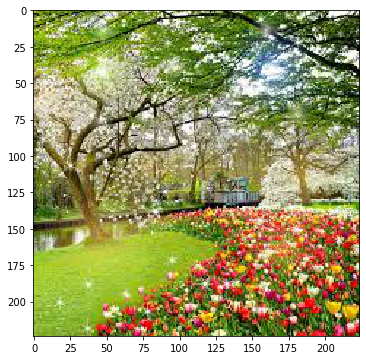

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.imshow(image_raw)

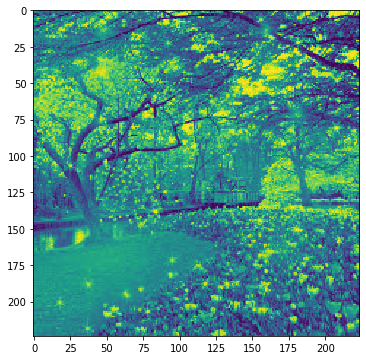

In [7]:
plt.figure(figsize=[8,6])
plt.imshow(ib)

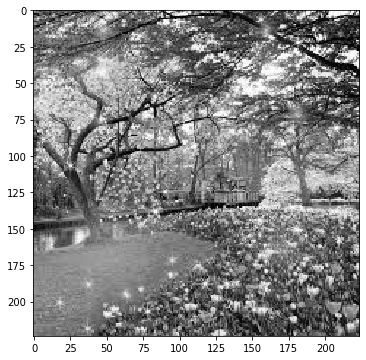

In [8]:
plt.figure(figsize=[8,6])
plt.imshow(ib,cmap=plt.cm.gray)

In [9]:
from sklearn.decomposition import PCA,IncrementalPCA
pca=PCA()
pca.fit(ib)
var=np.cumsum(pca.explained_variance_ratio_)*100
K=np.argmax(var>95)
print("no of elements are "+str(K))

no of elements are 90


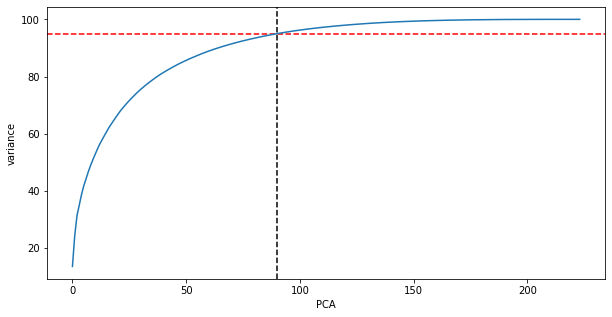

In [10]:
plt.figure(figsize=[10,5])
plt.ylabel('variance')
plt.xlabel('PCA')
plt.axvline(x=K,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')
ax=plt.plot(var)

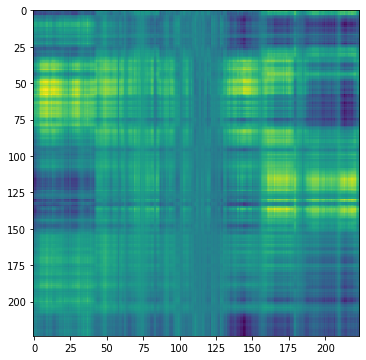

In [11]:
ipca=IncrementalPCA(n_components=2)
i=ipca.inverse_transform(ipca.fit_transform(ib))
plt.figure(figsize=[8,6])
plt.imshow(i)

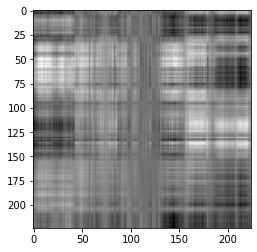

In [12]:
plt.imshow(i,cmap=plt.cm.gray)

In [13]:
def plot_at_k(K):
    ipca=IncrementalPCA(n_components=k)
    i=ipca.inverse_transform(ipca.fit_transform(ib))
    plt.imshow(i,cmap=lt.cm.gray)
k=50
plt.figure(figsize=[8,6])
print(k)

50


<Figure size 576x432 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

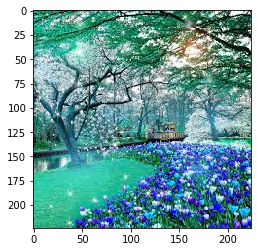

In [15]:
o_img=cv2.imread('download.jfif')
img=cv2.cvtColor(o_img,cv2.COLOR_BGR2RGB)
v=img.reshape((-1,3))
plt.imshow(o_img)

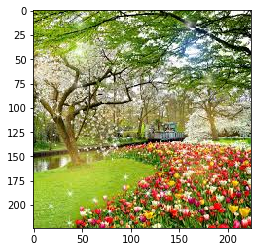

In [16]:
plt.imshow(img)

In [17]:
import numpy as np
v=np.float32(v)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
k=3
attempts=10
ret,label,center=cv2.kmeans(v,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

(<matplotlib.axes._subplots.AxesSubplot at 0x159a6461388>,
 <matplotlib.image.AxesImage at 0x159a64a6bc8>)

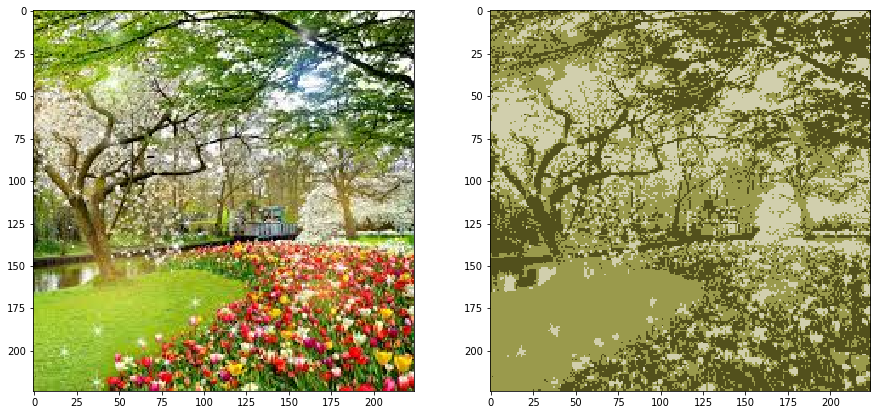

In [18]:
center=np.uint8(center)
res=center[label.flatten()]
r=res.reshape((img.shape))
f=15
plt.figure(figsize=(f,f))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(r)